# Natural Language Process :

### Summary of Datasets :
* Flags: Different codes that may relate to the way a query is classified or processed.
* Utterance: Various customer service inquiries, mainly related to orders.
* Category: Classifications, such as "ORDER," grouping utterances based on context.
* Intent: Specific actions such as "cancel_order," indicating the purpose of the customer's request

In [56]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import nltk

In [57]:
data=pd.read_csv('Bitext_Sample_Customer_Service_Training_Dataset.csv')

In [58]:
type(data)

pandas.core.frame.DataFrame

In [59]:
data.shape

(8175, 4)

In [60]:
data.size

32700

In [144]:
data['utterance']

0                 I have problems with canceling an order
1       how can I find information about canceling ord...
2               I need help with canceling the last order
3       could you help me cancelling the last order I ...
4                 problem with cancelling an order I made
                              ...                        
8170    I need help to check if there is any updates o...
8171                                        refund status
8172            how can I check the status of the refund?
8173    help checking if there is anything wrong with ...
8174                           anything new on my refund?
Name: utterance, Length: 8175, dtype: object

In [61]:
data.head()

,flags,utterance,category,intent
0,BM,I have problems with canceling an order,ORDER,cancel_order
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order
2,B,I need help with canceling the last order,ORDER,cancel_order
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order
4,B,problem with cancelling an order I made,ORDER,cancel_order


In [62]:
data.tail()

,flags,utterance,category,intent
8170,BM,I need help to check if there is any updates o...,REFUND,track_refund
8171,BK,refund status,REFUND,track_refund
8172,BI,how can I check the status of the refund?,REFUND,track_refund
8173,B,help checking if there is anything wrong with ...,REFUND,track_refund
8174,BI,anything new on my refund?,REFUND,track_refund


In [63]:
data.sample()

,flags,utterance,category,intent
7000,B,I try to set another shipping address up,SHIPPING_ADDRESS,set_up_shipping_address


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8175 entries, 0 to 8174
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   flags      8175 non-null   object
 1   utterance  8175 non-null   object
 2   category   8175 non-null   object
 3   intent     8175 non-null   object
dtypes: object(4)
memory usage: 255.6+ KB


In [65]:
data.describe()

,flags,utterance,category,intent
count,8175,8175,8175,8175
unique,118,8175,11,27
top,B,I have problems with canceling an order,ACCOUNT,get_invoice
freq,2395,1,1774,324


In [66]:
data.isnull().sum()

flags        0
utterance    0
category     0
intent       0
dtype: int64

## Insights :
* Zero Null values of Bitext datasets.

In [67]:
data.duplicated().sum()

0

## Insights :
* zero duplicated values for this datasets.

In [68]:
data.columns

Index(['flags', 'utterance', 'category', 'intent'], dtype='object')

In [69]:
data['flags'].unique()

array(['BM', 'BIM', 'B', 'BIP', 'BI', 'BE', 'BIMP', 'BP', 'BEM', 'BK',
       'BEP', 'BMP', 'BL', 'BLQ', 'BLQZ', 'BIL', 'BCILQZ', 'BLM', 'BELQ',
       'BCILQ', 'BLZ', 'BILQ', 'BKL', 'BLMQW', 'BLMQ', 'BEL', 'BKM',
       'BELZ', 'BELQZ', 'BLW', 'BLQW', 'BCLQ', 'BILWZ', 'BCIQ', 'BCEILMQ',
       'BLMQZ', 'BCILMQZ', 'BLMW', 'BILM', 'BLMZ', 'BILMQ', 'BILZ',
       'BILQZ', 'BILQW', 'BIQ', 'BEMP', 'BCELMQ', 'BCILMQ', 'BILMZ',
       'BELMQ', 'BCEIQ', 'BELMQZ', 'BCELZ', 'BELM', 'BCEILM', 'BCELMZ',
       'BCELMQWZ', 'BMQ', 'BELQW', 'BQZ', 'BCEILZ', 'BELMZ', 'BCELMQZ',
       'BILMQW', 'BCLMQ', 'BCL', 'BQ', 'BILW', 'BIQZ', 'BCLZ', 'BCIL',
       'BCELQ', 'BCELQZ', 'BILP', 'BCEILQ', 'BLPQ', 'BLP', 'BCEL',
       'BCLQZ', 'BILPQ', 'BCLQW', 'BKLZ', 'BCIZ', 'BELWZ', 'BCELQWZ',
       'BCEILQZ', 'BZ', 'BCEIL', 'BCLQWZ', 'BIMQ', 'BEQZ', 'BCILM',
       'BCLMQWZ', 'BCLM', 'BKLMZ', 'BILMQZ', 'BCLMZ', 'BCILZ', 'BKLQ',
       'BKLM', 'BLQWZ', 'BCILPQZ', 'BCLW', 'BEQ', 'BIPQ', 'BKQ', 'BIQWZ',
       'B

In [70]:
len(data['flags'].unique())

118

In [71]:
data['flags'].value_counts()

flags
B          2395
BI         1066
BM          803
BIP         605
BL          432
           ... 
BCLMQWZ       1
BCLM          1
BCLMQ         1
BCLMZ         1
BLWZ          1
Name: count, Length: 118, dtype: int64

In [72]:
data['utterance'].unique()

array(['I have problems with canceling an order',
       'how can I find information about canceling orders?',
       'I need help with canceling the last order', ...,
       'how can I check the status of the refund?',
       'help checking if there is anything wrong with my refund',
       'anything new on my refund?'], dtype=object)

In [73]:
len(data['utterance'].unique()) ## the srings are unique message's.

8175

In [74]:
data['utterance'].value_counts()

utterance
I have problems with canceling an order                        1
I need assistance reporting an issue with payment              1
I want help reporting an issue with payments                   1
question about my payment                                      1
I do not know what I have to do to report payment issues       1
                                                              ..
can you help me to talk to customer assistance?                1
do you have an e-mail address to contact customer support ?    1
i wantg assistance to call customer service                    1
help checking what hours customer service available is         1
anything new on my refund?                                     1
Name: count, Length: 8175, dtype: int64

In [75]:
data['category'].unique()

array(['ORDER', 'SHIPPING_ADDRESS', 'CANCELLATION_FEE', 'INVOICE',
       'PAYMENT', 'REFUND', 'FEEDBACK', 'CONTACT', 'ACCOUNT', 'DELIVERY',
       'NEWSLETTER'], dtype=object)

In [76]:
len(data['category'].unique())

11

In [77]:
data['category'].value_counts()

category
ACCOUNT             1774
ORDER               1220
REFUND               904
INVOICE              648
PAYMENT              620
FEEDBACK             613
SHIPPING_ADDRESS     604
DELIVERY             603
CONTACT              596
CANCELLATION_FEE     298
NEWSLETTER           295
Name: count, dtype: int64

In [78]:
data['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [79]:
len(data['intent'].unique())

27

In [80]:
data['intent'].value_counts()

intent
get_invoice                 324
check_invoice               324
payment_issue               323
review                      315
track_refund                308
set_up_shipping_address     307
place_order                 306
track_order                 305
cancel_order                305
change_order                304
delivery_options            302
check_refund_policy         302
delivery_period             301
contact_customer_service    299
create_account              298
check_cancellation_fee      298
recover_password            298
complaint                   298
delete_account              298
check_payment_methods       297
change_shipping_address     297
contact_human_agent         297
registration_problems       296
newsletter_subscription     295
get_refund                  294
edit_account                294
switch_account              290
Name: count, dtype: int64

In [81]:
## These is downloaded stopwords and punkt is tokenizer from nltk libraries.
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Libraries :

In [82]:
import re

In [83]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [84]:
from nltk.stem import SnowballStemmer,PorterStemmer,RegexpStemmer,WordNetLemmatizer

In [85]:
stemming=PorterStemmer()

In [86]:
lemmatization=WordNetLemmatizer()

## Preprocessing the text :

Choose the Right Tokenizer:

Depending on your application, choose a tokenizer that best suits your needs. For simple tasks, split() might suffice, but for more complex NLP tasks, consider using word_tokenize from NLTK or tokenizers from spaCy.

re.sub(): Replaces occurrences of a pattern with a replacement string

* Pattern: r'[^a-zA-Z\s]' – This regex matches any character that is not a letter (a-z, A-Z) or a space (\s).
* Replacement: '' – We replace the matched characters with an empty string, effectively removing them.
* String: The original text to be cleaned.

* Conclusion:
re.sub() is a powerful function that allows you to search for patterns in a string and replace them with new content, either globally or for a limited number of matches.

The pattern r'[^a-zA-Z\s]' removes everything except letters and spaces. So punctuation like commas, exclamation marks, and digits (1234) are all removed.

#### Summary:
* [^a-zA-Z\s] means "find everything that is not a letter (a-z, A-Z) or a space."
This is useful in cleaning text when you want to remove punctuation or special characters but keep letters and spaces.

#### Parameters:
* pattern: The regular expression pattern that you want to search for within the string.
* replacement: The string to replace the matched pattern.
* string: The input string in which the substitution occurs.
* count (optional): The number of occurrences to replace. By default, it replaces all occurrences. You can specify a number to limit the number of replacements.
* flags (optional): Modifiers like re.IGNORECASE to specify matching options (e.g., case-insensitive search).
#### Returns(re.sub):
* The function returns a new string with the specified pattern replaced by the replacement string.

#### what is re ?
* The re.sub() function in Python’s re module is used to substitute or replace occurrences of a specified pattern in a string with a replacement string.

#### Syntax :

re.sub(pattern, replacement, string, count=0, flags=0)


#### Breakdown:
1. **Lowercasing**: Converts all text to lowercase.
2. **Removing Special Characters**: Removes anything that isn't a letter or space, including punctuation and numbers.
3. **Tokenization**: Splits the text into individual words using `nltk.word_tokenize()`.
4. **Removing Stopwords**: Removes common words like "the", "is", "and" that may not contribute to the meaning using NLTK's list of stopwords.
5. **Rejoining Tokens**: After filtering out stopwords, the remaining tokens are joined back into a cleaned string.

This cleaned text can now be fed into a feature extraction process (e.g., TF-IDF) for training a model.

Would you like help with the next steps or running this on your dataset?

In [88]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [89]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Apply stemming and lemmatization
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    # Join tokens back into a cleaned text string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

## Insights :
* **Stemming:** Porterstemmer and wordnetlemmatizer combinations is better peroformance get the output.
    other stemmers are poor performance of outputs.so we have used PorterStemmer and wordnetlemmatizer.   

In [90]:
data['clean_utterance']=data['utterance'].apply(clean_text)

In [91]:
data['clean_utterance'].head()  ## create the new feature's.

0                 problem cancel order
1             find inform cancel order
2          need help cancel last order
3    could help cancel last order made
4            problem cancel order made
Name: clean_utterance, dtype: object

In [92]:
data['utterance'].head()  ## This is a old feature's.

0              I have problems with canceling an order
1    how can I find information about canceling ord...
2            I need help with canceling the last order
3    could you help me cancelling the last order I ...
4              problem with cancelling an order I made
Name: utterance, dtype: object

In [93]:
data.head()

,flags,utterance,category,intent,clean_utterance
0,BM,I have problems with canceling an order,ORDER,cancel_order,problem cancel order
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order,find inform cancel order
2,B,I need help with canceling the last order,ORDER,cancel_order,need help cancel last order
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order,could help cancel last order made
4,B,problem with cancelling an order I made,ORDER,cancel_order,problem cancel order made


In [94]:
data[['utterance','clean_utterance']]

,utterance,clean_utterance
0,I have problems with canceling an order,problem cancel order
1,how can I find information about canceling ord...,find inform cancel order
2,I need help with canceling the last order,need help cancel last order
3,could you help me cancelling the last order I ...,could help cancel last order made
4,problem with cancelling an order I made,problem cancel order made
...,...,...
8170,I need help to check if there is any updates o...,need help check updat refund
8171,refund status,refund statu
8172,how can I check the status of the refund?,check statu refund
8173,help checking if there is anything wrong with ...,help check anyth wrong refund


In [95]:
type(data['clean_utterance'])

pandas.core.series.Series

In [96]:
data['clean_utterance'].dtype

dtype('O')

## Cleaned text into Numeric values :

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
vectorizer=TfidfVectorizer(max_features=5000,ngram_range=(1,2))  # Limit to 5000 features
tfid=vectorizer.fit_transform(data['clean_utterance']) ## Convert string into numerical

In [99]:
print(vectorizer.get_feature_names_out())

['abuot' 'abuot lost' 'accdss' ... 'yet wan' 'youur' 'youur servic']


In [100]:
print(tfid.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Insights:
* **Sparse Matrix:** The resulting matrix is usually sparse since most terms do not appear in every document.
* **Efficient Representation:** TF-IDF is an effective way to represent text in a format usable by machine learning models like logistic regression, SVM, or neural networks.
* This technique helps convert the customer utterances into numerical features that models can understand.

In [101]:
type(tfid)

scipy.sparse._csr.csr_matrix

In [102]:
tfid.dtype

dtype('float64')

In [103]:
data.head()

,flags,utterance,category,intent,clean_utterance
0,BM,I have problems with canceling an order,ORDER,cancel_order,problem cancel order
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order,find inform cancel order
2,B,I need help with canceling the last order,ORDER,cancel_order,need help cancel last order
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order,could help cancel last order made
4,B,problem with cancelling an order I made,ORDER,cancel_order,problem cancel order made


## Split the datasets :

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [105]:
X_train,X_test,y_train,y_test=train_test_split(tfid,data['intent'],test_size=0.2,random_state=42)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6540, 2623)
(1635, 2623)
(6540,)
(1635,)


## Implementation of the Models :

## Logistic Regression 

In [107]:
model=LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [108]:
y_pred=model.predict(X_test)
y_pred

array(['edit_account', 'payment_issue', 'delete_account', ..., 'review',
       'track_refund', 'create_account'], dtype=object)

In [109]:
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.9963302752293578

In [110]:
f1_logistic=f1_score(y_test,y_pred,average='micro')
f1_logistic

0.9963302752293578

In [111]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

            cancel_order       1.00      1.00      1.00        62
            change_order       1.00      1.00      1.00        70
 change_shipping_address       1.00      1.00      1.00        60
  check_cancellation_fee       1.00      0.98      0.99        66
           check_invoice       1.00      1.00      1.00        63
   check_payment_methods       1.00      0.99      0.99        68
     check_refund_policy       1.00      1.00      1.00        59
               complaint       1.00      1.00      1.00        52
contact_customer_service       1.00      1.00      1.00        61
     contact_human_agent       0.97      1.00      0.98        57
          create_account       0.98      0.98      0.98        62
          delete_account       1.00      1.00      1.00        53
        delivery_options       0.98      1.00      0.99        55
         delivery_period       1.00      1.00      1.00        49
         

## Support Vector Machines:

In [112]:
from sklearn.svm import SVC

In [113]:
model_svc=SVC(class_weight='balanced')
model_svc.fit(X_train,y_train)

SVC(class_weight='balanced')

In [114]:
y_pred_svc=model_svc.predict(X_test)
y_pred_svc

array(['edit_account', 'payment_issue', 'delete_account', ..., 'review',
       'track_refund', 'create_account'], dtype=object)

In [115]:
accuracy_svc=accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.9957186544342508

In [116]:
f1_svc=f1_score(y_test,y_pred_svc,average='micro')
f1_svc

0.9957186544342508

In [117]:
print(classification_report(y_test,y_pred_svc))

                          precision    recall  f1-score   support

            cancel_order       1.00      1.00      1.00        62
            change_order       1.00      1.00      1.00        70
 change_shipping_address       1.00      1.00      1.00        60
  check_cancellation_fee       1.00      0.98      0.99        66
           check_invoice       1.00      1.00      1.00        63
   check_payment_methods       1.00      0.97      0.99        68
     check_refund_policy       1.00      1.00      1.00        59
               complaint       1.00      1.00      1.00        52
contact_customer_service       1.00      1.00      1.00        61
     contact_human_agent       0.92      1.00      0.96        57
          create_account       1.00      1.00      1.00        62
          delete_account       1.00      1.00      1.00        53
        delivery_options       1.00      1.00      1.00        55
         delivery_period       1.00      1.00      1.00        49
         

In [119]:
from sklearn.metrics import f1_score,confusion_matrix

In [120]:
pd.crosstab(y_test,y_pred_svc)

col_0,cancel_order,change_order,change_shipping_address,check_cancellation_fee,check_invoice,check_payment_methods,check_refund_policy,complaint,contact_customer_service,contact_human_agent,...,newsletter_subscription,payment_issue,place_order,recover_password,registration_problems,review,set_up_shipping_address,switch_account,track_order,track_refund
intent,,,,,,,,,,,,,,,,,,,,,
cancel_order,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
change_order,0,70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
change_shipping_address,0,0,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_cancellation_fee,0,0,0,65,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
check_invoice,0,0,0,0,63,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check_payment_methods,0,0,0,0,0,66,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
check_refund_policy,0,0,0,0,0,0,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
complaint,0,0,0,0,0,0,0,52,0,0,...,0,0,0,0,0,0,0,0,0,0
contact_customer_service,0,0,0,0,0,0,0,0,61,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
cm=confusion_matrix(y_test,y_pred_svc)

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
labels_names=['Negative', 'Positive']

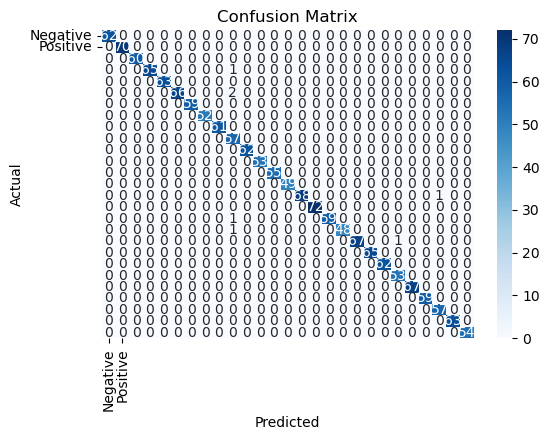

In [77]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_names, yticklabels=labels_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Hyper Parameters Logistic Regression:

In [122]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameters = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression(max_iter=1000)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train, y_train)
best_C = clf.best_params_['C']
best_C

100

In [123]:
model_logistic_hyper=LogisticRegression(C=100,class_weight='balanced',solver='liblinear',random_state=42)
model_logistic_hyper.fit(X_train,y_train)

LogisticRegression(C=100, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [124]:
y_pred_logistic_hyper=model_logistic_hyper.predict(X_test)
y_pred_logistic_hyper

array(['edit_account', 'payment_issue', 'delete_account', ..., 'review',
       'track_refund', 'create_account'], dtype=object)

In [125]:
accuracy_logistic_hyper=accuracy_score(y_test,y_pred_logistic_hyper)
accuracy_logistic_hyper

0.9969418960244648

In [126]:
print(classification_report(y_test,y_pred_logistic_hyper))

                          precision    recall  f1-score   support

            cancel_order       1.00      1.00      1.00        62
            change_order       1.00      1.00      1.00        70
 change_shipping_address       1.00      1.00      1.00        60
  check_cancellation_fee       1.00      0.98      0.99        66
           check_invoice       1.00      1.00      1.00        63
   check_payment_methods       1.00      0.99      0.99        68
     check_refund_policy       1.00      1.00      1.00        59
               complaint       1.00      1.00      1.00        52
contact_customer_service       1.00      1.00      1.00        61
     contact_human_agent       0.98      1.00      0.99        57
          create_account       1.00      0.98      0.99        62
          delete_account       1.00      1.00      1.00        53
        delivery_options       0.98      1.00      0.99        55
         delivery_period       1.00      1.00      1.00        49
         

In [127]:
f1_logistic_hyper=f1_score(y_test,y_pred_logistic_hyper,average='micro')
f1_logistic_hyper

0.9969418960244648

## Hyper Parameter Support Vector Machines:

In [128]:
sv=SVC()

In [94]:
parameters = {'C': [0.01, 0.1, 1, 10, 100],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
sv = SVC()
clf = GridSearchCV(sv, parameters, cv=5)
clf.fit(X_train, y_train)
best = clf.best_params_
best

{'C': 10, 'kernel': 'sigmoid'}

In [99]:
clf.best_params_

{'C': 10, 'kernel': 'sigmoid'}

In [129]:
svc_hyper_parameters=SVC(C=10,kernel='sigmoid',class_weight='balanced',random_state=42)
svc_hyper_parameters.fit(X_train,y_train)

SVC(C=10, class_weight='balanced', kernel='sigmoid', random_state=42)

In [130]:
y_pred_svc_hyper=svc_hyper_parameters.predict(X_test)
y_pred_svc_hyper

array(['edit_account', 'payment_issue', 'delete_account', ..., 'review',
       'track_refund', 'create_account'], dtype=object)

In [131]:
accuracy_svc_hyper=accuracy_score(y_test,y_pred_svc_hyper)
accuracy_svc_hyper

0.9975535168195718

In [132]:
print(classification_report(y_test,y_pred_svc_hyper))

                          precision    recall  f1-score   support

            cancel_order       1.00      1.00      1.00        62
            change_order       1.00      1.00      1.00        70
 change_shipping_address       1.00      1.00      1.00        60
  check_cancellation_fee       1.00      1.00      1.00        66
           check_invoice       1.00      1.00      1.00        63
   check_payment_methods       1.00      1.00      1.00        68
     check_refund_policy       1.00      1.00      1.00        59
               complaint       1.00      1.00      1.00        52
contact_customer_service       1.00      1.00      1.00        61
     contact_human_agent       0.98      1.00      0.99        57
          create_account       1.00      0.98      0.99        62
          delete_account       0.98      1.00      0.99        53
        delivery_options       1.00      1.00      1.00        55
         delivery_period       1.00      1.00      1.00        49
         

In [133]:
f1_svc_hyper=f1_score(y_test,y_pred_svc_hyper,average='micro')
f1_svc_hyper

0.9975535168195718

## Compariasion of Accuracy scores of all Models :

In [134]:
accuracy={'accuracy_svc':99.57,'accuracy_logistic':99.63,'accuracy_logistic_hyper':99.69,'accuracy_svc_hyper':99.75}
key_scores=accuracy.keys()
value_scores=accuracy.values()

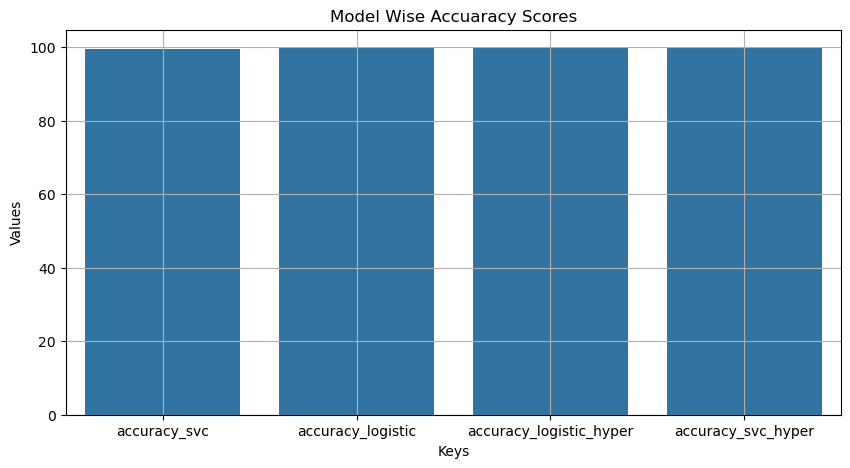

<Figure size 640x480 with 0 Axes>

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(x=key_scores,y=value_scores)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Model Wise Accuaracy Scores')
plt.grid()
plt.show()
plt.tight_layout()

## Insights :
* The Maxmimum highest accuracy score of model is Support Vector Machines Hyper tunings.

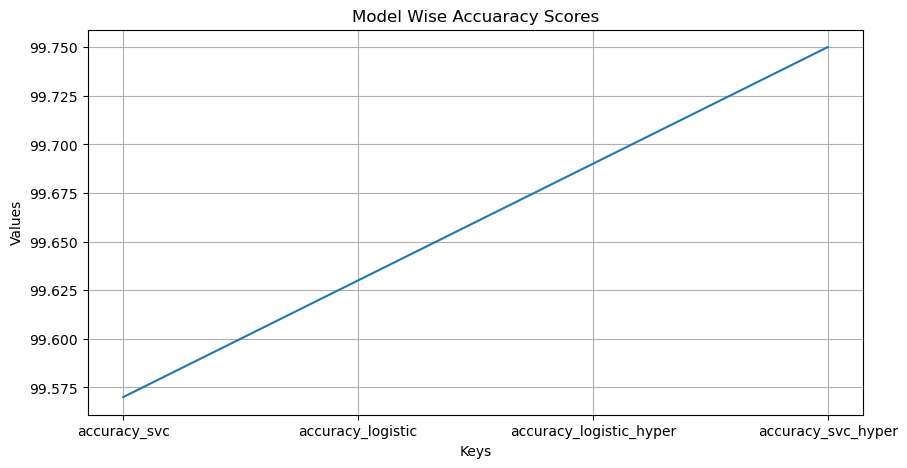

<Figure size 640x480 with 0 Axes>

In [115]:
plt.figure(figsize=(10,5))
sns.lineplot(x=key_scores,y=value_scores)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Model Wise Accuaracy Scores')
plt.grid()
plt.show()
plt.tight_layout()

## Insights :
* accuracy_svc_hyper is a better performance in this datasets.

* **Focus on automation:** Given the large number of queries related to order cancellations, automating such requests can help reduce response time and operational costs.
* **Training and Optimization:** Models can be trained using this dataset to classify intents, allowing for automated systems or chatbots to handle these inquiries. The data can also be used to fine-tune existing models or identify areas where customer service agents need more training.

## Deployment :
* The dataset is well-suited for training intent recognition models, and also test datas, it can be deployed in a scalable cloud environment. By using machine learning to predict intents and address common queries, the system can ensure that repetitive queries are handled more efficiently.

## Conclusion :

* **Bitext Sample Customer Service Training Dataset** focuses on classifying customer queries into specific intents like "cancel_order." It highlights the importance of automating common queries, especially those related to order management. The dataset’s structure makes it ideal for training intent recognition models to streamline customer service operations. By automating frequent tasks, businesses can improve response times and reduce manual intervention. Overall, this dataset supports efficient model training for scalable, automated customer service solutions.

## Deployments :

In [135]:
import pickle

In [136]:
file=open('SVC_model.pkl','wb')
pickle.dump(svc_hyper_parameters,file)